# Forecast the CoCaCola Sales data set. Prepare a document for each model explaining how many dummy variables you have created and RMSE value for each model. Finally which model you will use for Forecasting.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_excel("CocaCola_Sales_Rawdata.xlsx")

In [3]:
data

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


# EDA

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [5]:
data.isnull().sum()

Quarter    0
Sales      0
dtype: int64

In [6]:
data.duplicated().sum()

0

In [7]:
data['Quarter_Year'] = data['Quarter'].str.split('_').apply(lambda x: ' 19'.join(x[:]))
data

,Quarter,Sales,Quarter_Year
0,Q1_86,1734.827000,Q1 1986
1,Q2_86,2244.960999,Q2 1986
2,Q3_86,2533.804993,Q3 1986
3,Q4_86,2154.962997,Q4 1986
4,Q1_87,1547.818996,Q1 1987
5,Q2_87,2104.411995,Q2 1987
6,Q3_87,2014.362999,Q3 1987
7,Q4_87,1991.746998,Q4 1987
8,Q1_88,1869.049999,Q1 1988
9,Q2_88,2313.631996,Q2 1988


# Converting Quaterly data into Monthly dataset

In [8]:
data['date'] = (
    pd.to_datetime(
        data['Quarter_Year'].str.split(' ').apply(lambda x: ''.join(x[::-1]))
,dayfirst=True))

In [9]:
data

,Quarter,Sales,Quarter_Year,date
0,Q1_86,1734.827000,Q1 1986,1986-01-01
1,Q2_86,2244.960999,Q2 1986,1986-04-01
2,Q3_86,2533.804993,Q3 1986,1986-07-01
3,Q4_86,2154.962997,Q4 1986,1986-10-01
4,Q1_87,1547.818996,Q1 1987,1987-01-01
5,Q2_87,2104.411995,Q2 1987,1987-04-01
6,Q3_87,2014.362999,Q3 1987,1987-07-01
7,Q4_87,1991.746998,Q4 1987,1987-10-01
8,Q1_88,1869.049999,Q1 1988,1988-01-01
9,Q2_88,2313.631996,Q2 1988,1988-04-01


In [10]:
data.drop(columns=['Quarter','Quarter_Year'],inplace=True)

In [11]:
data

,Sales,date
0,1734.827000,1986-01-01
1,2244.960999,1986-04-01
2,2533.804993,1986-07-01
3,2154.962997,1986-10-01
4,1547.818996,1987-01-01
5,2104.411995,1987-04-01
6,2014.362999,1987-07-01
7,1991.746998,1987-10-01
8,1869.049999,1988-01-01
9,2313.631996,1988-04-01


In [12]:
data.columns = ["Sales", 'date']
data['date'] = pd.to_datetime(data['date'], format='%Y-%m')
data = data.set_index('date')
data.head()

,Sales
date,
1986-01-01,1734.827000
1986-04-01,2244.960999
1986-07-01,2533.804993
1986-10-01,2154.962997
1987-01-01,1547.818996


In [13]:
data

,Sales
date,
1986-01-01,1734.827000
1986-04-01,2244.960999
1986-07-01,2533.804993
1986-10-01,2154.962997
1987-01-01,1547.818996
1987-04-01,2104.411995
1987-07-01,2014.362999
1987-10-01,1991.746998
1988-01-01,1869.049999


# Plot Time Series Data

<AxesSubplot:xlabel='date'>

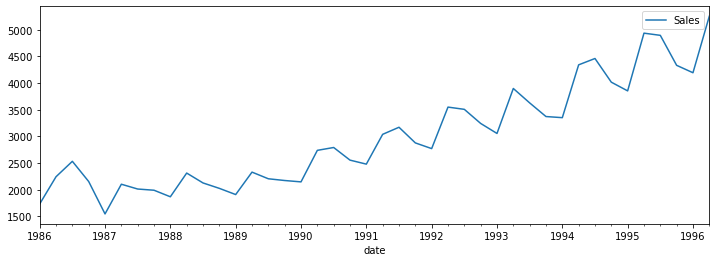

In [14]:
data.plot(figsize=(12,4))

# Box Plot For Outlier Detection

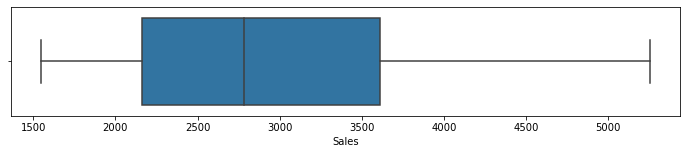

In [15]:
fig = plt.subplots(figsize=(12,2))
ax = sns.boxplot(data['Sales'])

# Histogram

<AxesSubplot:>

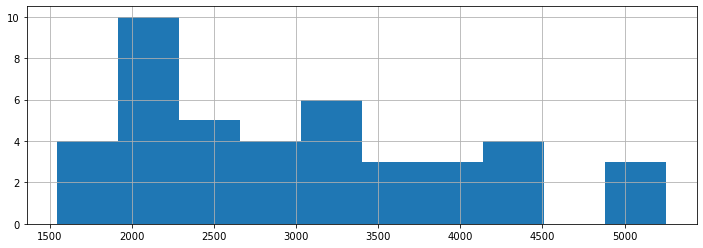

In [16]:
data['Sales'].hist(figsize=(12,4))

# Handling Missing Values

## UpSampling

In [17]:
upsampled = data.resample('M').mean()
print(upsampled.head(32))

                  Sales
date                   
1986-01-31  1734.827000
1986-02-28          NaN
1986-03-31          NaN
1986-04-30  2244.960999
1986-05-31          NaN
1986-06-30          NaN
1986-07-31  2533.804993
1986-08-31          NaN
1986-09-30          NaN
1986-10-31  2154.962997
1986-11-30          NaN
1986-12-31          NaN
1987-01-31  1547.818996
1987-02-28          NaN
1987-03-31          NaN
1987-04-30  2104.411995
1987-05-31          NaN
1987-06-30          NaN
1987-07-31  2014.362999
1987-08-31          NaN
1987-09-30          NaN
1987-10-31  1991.746998
1987-11-30          NaN
1987-12-31          NaN
1988-01-31  1869.049999
1988-02-29          NaN
1988-03-31          NaN
1988-04-30  2313.631996
1988-05-31          NaN
1988-06-30          NaN
1988-07-31  2128.320000
1988-08-31          NaN


                  Sales
date                   
1986-01-31  1734.827000
1986-02-28  1904.871666
1986-03-31  2074.916332
1986-04-30  2244.960999
1986-05-31  2341.242330
1986-06-30  2437.523661
1986-07-31  2533.804993
1986-08-31  2407.524328
1986-09-30  2281.243663
1986-10-31  2154.962997
1986-11-30  1952.581664
1986-12-31  1750.200330
1987-01-31  1547.818996
1987-02-28  1733.349996
1987-03-31  1918.880995


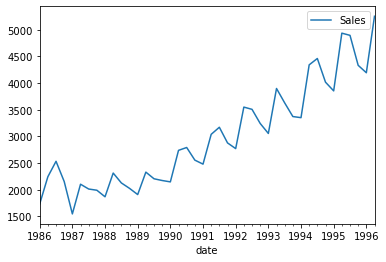

In [18]:
interpolated = upsampled.interpolate(method='linear') ## interplation was done for nan values which we get after doing upsampling by month
print(interpolated.head(15))
interpolated.plot()
plt.show()

In [19]:
interpolated

,Sales
date,
1986-01-31,1734.827000
1986-02-28,1904.871666
1986-03-31,2074.916332
1986-04-30,2244.960999
1986-05-31,2341.242330
...,...
1995-12-31,4240.333333
1996-01-31,4194.000000
1996-02-29,4547.000000


In [20]:
data = interpolated.copy()

In [21]:
data

,Sales
date,
1986-01-31,1734.827000
1986-02-28,1904.871666
1986-03-31,2074.916332
1986-04-30,2244.960999
1986-05-31,2341.242330
...,...
1995-12-31,4240.333333
1996-01-31,4194.000000
1996-02-29,4547.000000


# Time Series Decomposition

## Additive Seasonal Decomposition

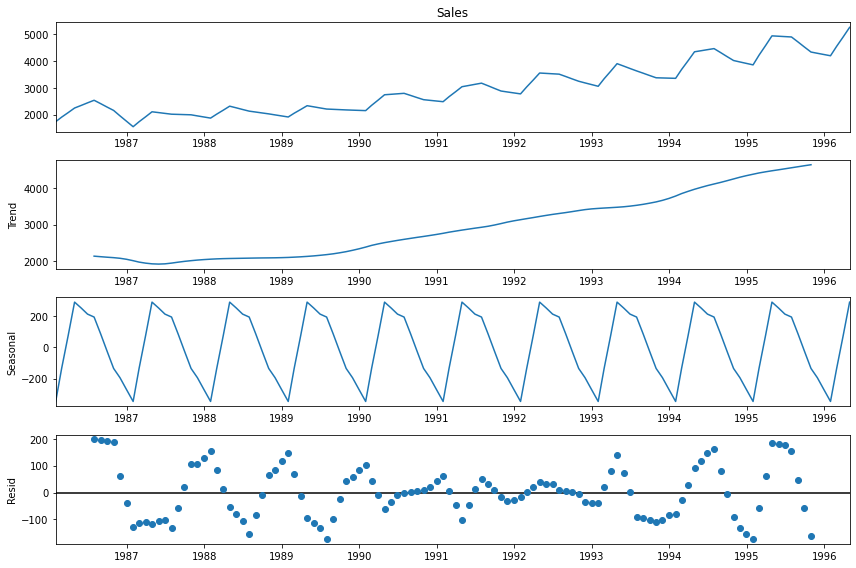

In [22]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 12,8
decomposition = sm.tsa.seasonal_decompose(data['Sales'], model='additive')
fig = decomposition.plot()
plt.show()

## Multiplicative Seasonal Decomposition

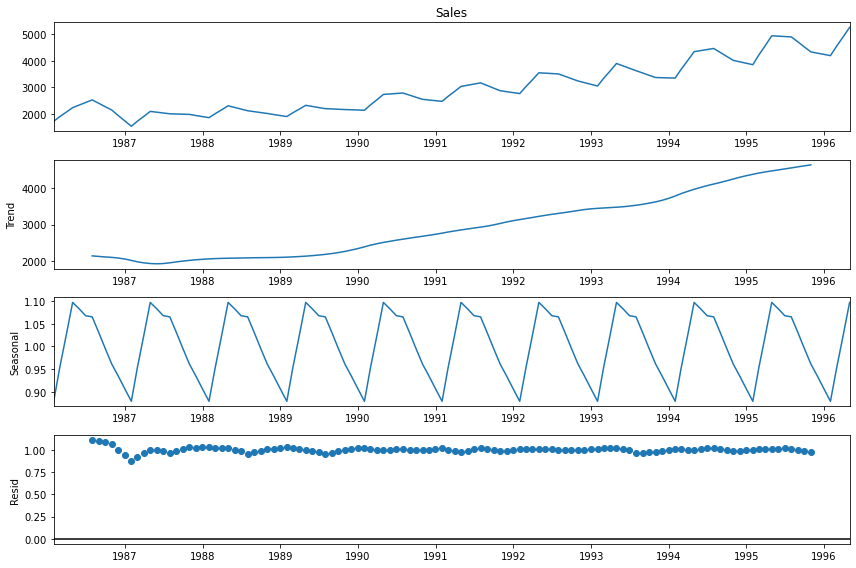

In [23]:
decomposition = sm.tsa.seasonal_decompose(data['Sales'], model='multiplicative')
fig = decomposition.plot()
plt.show()

# Spliting the data into Train and Test

In [24]:
train_len = 100
train = data[0:train_len]
test = data[train_len:]

In [25]:
train.head()

,Sales
date,
1986-01-31,1734.827000
1986-02-28,1904.871666
1986-03-31,2074.916332
1986-04-30,2244.960999
1986-05-31,2341.242330


In [26]:
test.head()

,Sales
date,
1994-05-31,4381.666667
1994-06-30,4421.333333
1994-07-31,4461.000000
1994-08-31,4313.000000
1994-09-30,4165.000000


# Simple Average Method

In [27]:
y_hat_avg = test.copy()

In [28]:
y_hat_avg['avg_forecast'] = train['Sales'].mean()

In [29]:
y_hat_avg.head()

,Sales,avg_forecast
date,,
1994-05-31,4381.666667,2633.826898
1994-06-30,4421.333333,2633.826898
1994-07-31,4461.000000,2633.826898
1994-08-31,4313.000000,2633.826898
1994-09-30,4165.000000,2633.826898


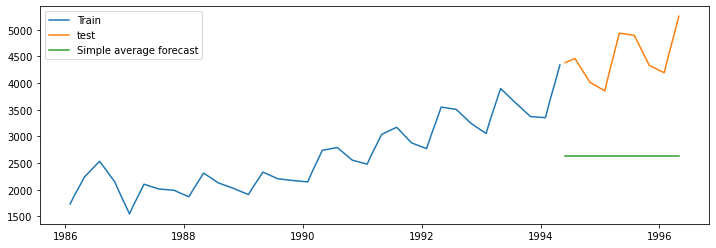

In [30]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='test')
plt.plot(y_hat_avg['avg_forecast'], label='Simple average forecast')
plt.legend(loc='best')
plt.show()

# Calculating RMSE and MAPE Score For Simple Average Method

In [31]:
from sklearn.metrics import mean_squared_error

# RMSE

In [32]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_avg['avg_forecast'])).round(2)
rmse

1857.28

# MAPE Score

In [33]:
mape = round(np.mean(np.abs((test['Sales'] - y_hat_avg['avg_forecast'])/test['Sales'])*100),2)
mape

40.49

In [34]:
results = pd.DataFrame({'Method':['Simple Average Method'], 'RMSE':[rmse], 'MAPE':[mape]})
results

,Method,RMSE,MAPE
0,Simple Average Method,1857.28,40.49


# Simple Moving Average Method

In [35]:
y_hat_sma = data.copy()

In [36]:
ma_window = 12

In [37]:
y_hat_sma['sma_forecast'] = data['Sales'].rolling(ma_window).mean()

In [38]:
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]

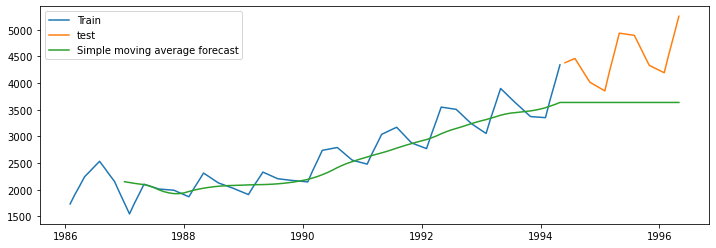

In [39]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='test')
plt.plot(y_hat_sma['sma_forecast'], label='Simple moving average forecast')
plt.legend(loc='best')
plt.show()

# RMSE

In [40]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_sma['sma_forecast'][train_len:])).round(2)
rmse

895.54

# MAPE Score

In [41]:
mape = round(np.mean(np.abs((test['Sales'] - y_hat_sma['sma_forecast'][train_len:])/test['Sales'])*100),2)
mape

17.82

In [42]:
results = results.append({'Method':'Simple moving average method', 'RMSE':rmse, 'MAPE':mape}, ignore_index=True)
results

,Method,RMSE,MAPE
0,Simple Average Method,1857.28,40.49
1,Simple moving average method,895.54,17.82


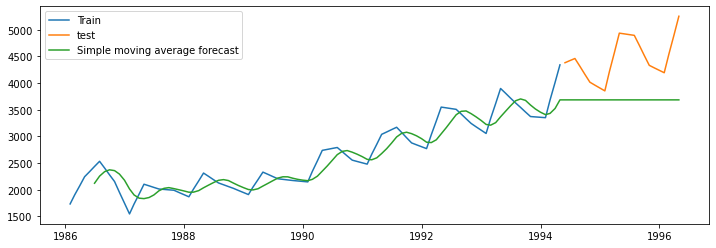

In [43]:
ma_window = 6
y_hat_sma['sma_forecast'] = data['Sales'].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='test')
plt.plot(y_hat_sma['sma_forecast'], label='Simple moving average forecast')
plt.legend(loc='best')
plt.show()

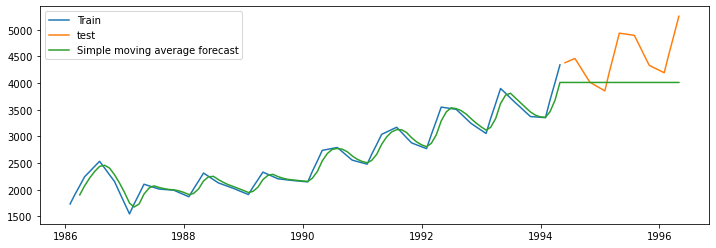

In [44]:
ma_window = 3
y_hat_sma['sma_forecast'] = data['Sales'].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='test')
plt.plot(y_hat_sma['sma_forecast'], label='Simple moving average forecast')
plt.legend(loc='best')
plt.show()


# Simple Exponential Smoothning

In [45]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [46]:
# Instantiate the model
model = SimpleExpSmoothing(train['Sales'])
# Fit the model with alpha = 0.2 
# optimized = False means, we are explicitly definign the smoothing_level.
# optimized = True means - Automitacially it will define a smoothing_level based on RMSE
model_fit = model.fit(smoothing_level = 0.2, optimized=True)
model_fit.params

{'smoothing_level': 0.2,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 2068.189967803788,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [47]:
y_hat_ses = test.copy()
y_hat_ses['ses_forecast'] = model_fit.forecast(24)

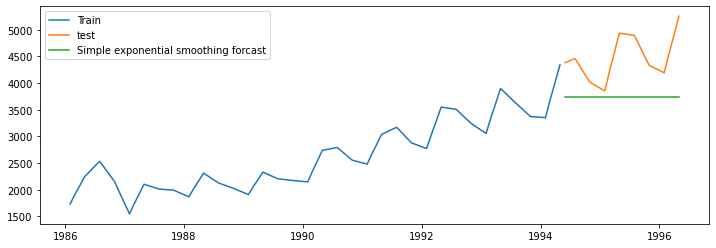

In [48]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='test')
plt.plot(y_hat_ses['ses_forecast'], label='Simple exponential smoothing forcast')
plt.legend(loc='best')
plt.show()

# RMSE

In [49]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_ses['ses_forecast'])).round(2)
rmse

802.75

# MAPE Score

In [50]:
mape = round(np.mean(np.abs((test['Sales'] - y_hat_ses['ses_forecast'])/test['Sales'])*100),2)
mape

15.49

In [51]:
results = results.append({'Method':'Simple exponential smoothing method', 'RMSE':rmse, 'MAPE':mape}, ignore_index=True)
results

,Method,RMSE,MAPE
0,Simple Average Method,1857.28,40.49
1,Simple moving average method,895.54,17.82
2,Simple exponential smoothing method,802.75,15.49


# Holt's Exponential Smoothing

In [52]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [53]:
model = ExponentialSmoothing(np.asarray(train['Sales']), seasonal_periods = 12, trend='additive', seasonal=None)

In [54]:
model_fit = model.fit(smoothing_level = 0.2, smoothing_slope = 0.01, optimized=True)
model_fit.params

{'smoothing_level': 0.2,
 'smoothing_trend': 0.01,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1983.4659985481667,
 'initial_trend': 16.832141258699508,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [55]:
y_hat_holt = test.copy()
# We are forecasting for next 24 months
y_hat_holt['holt_forecast'] = model_fit.forecast(24)

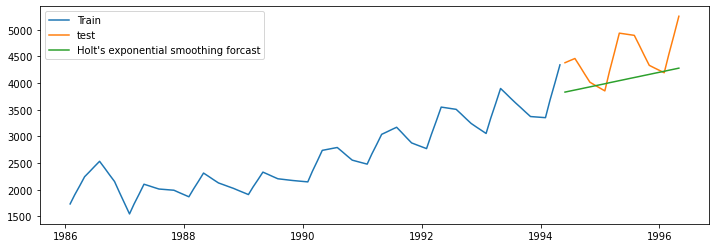

In [56]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='test')
plt.plot(y_hat_holt['holt_forecast'], label='Holt\'s exponential smoothing forcast')
plt.legend(loc='best')
plt.show()

# RMSE

In [57]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_holt['holt_forecast'])).round(2)
rmse

516.39

# MAPE Score

In [58]:
mape = round(np.mean(np.abs((test['Sales'] - y_hat_holt['holt_forecast'])/test['Sales'])*100),2)
mape

8.94

In [59]:
results = results.append({'Method':'Holt\'s exponential smoothing method', 'RMSE':rmse, 'MAPE':mape}, ignore_index=True)
results

,Method,RMSE,MAPE
0,Simple Average Method,1857.28,40.49
1,Simple moving average method,895.54,17.82
2,Simple exponential smoothing method,802.75,15.49
3,Holt's exponential smoothing method,516.39,8.94


# Holt-Winters's Exponential Smoothing

## Additive Method

In [60]:
y_hat_hwa = test.copy()

In [61]:
model = ExponentialSmoothing(np.asarray(train['Sales']), seasonal_periods = 12, trend='additive', seasonal='additive')

In [62]:
model_fit = model.fit(optimized=True)

In [63]:
model_fit.params

{'smoothing_level': 0.9255066519828545,
 'smoothing_trend': 0.9106397388403635,
 'smoothing_seasonal': 0.06316606884714494,
 'damping_trend': nan,
 'initial_level': 2342.9106593385814,
 'initial_trend': -4.688567402987162,
 'initial_seasons': array([-585.83333316, -407.67536179, -200.53029898,   18.59663999,
          52.78979111,   84.78698271,   97.95658643,   23.46449634,
         -78.86824447, -192.10423943, -326.74475581, -472.04079423]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [64]:
y_hat_hwa['hwa_forecast'] = model_fit.forecast(24)

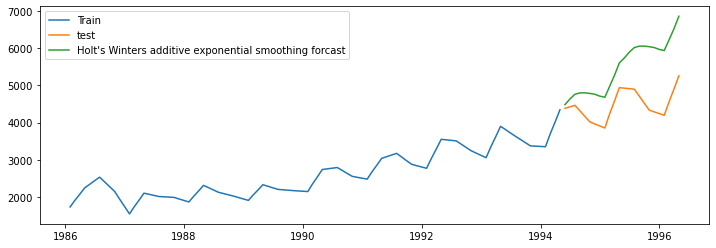

In [65]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='test')
plt.plot(y_hat_hwa['hwa_forecast'], label='Holt\'s Winters additive exponential smoothing forcast')
plt.legend(loc='best')
plt.show()

# RMSE

In [66]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_hwa['hwa_forecast'])).round(2)
rmse

1147.28

# MAPE Score

In [67]:
mape = round(np.mean(np.abs((test['Sales'] - y_hat_hwa['hwa_forecast'])/test['Sales'])*100),2)
mape

22.93

In [68]:
results = results.append({'Method':'Holt\'s Winter additive method', 'RMSE':rmse, 'MAPE':mape}, ignore_index=True)
results

,Method,RMSE,MAPE
0,Simple Average Method,1857.28,40.49
1,Simple moving average method,895.54,17.82
2,Simple exponential smoothing method,802.75,15.49
3,Holt's exponential smoothing method,516.39,8.94
4,Holt's Winter additive method,1147.28,22.93


## Multiplicative Method

In [69]:
y_hat_hwm = test.copy()

In [70]:
model = ExponentialSmoothing(np.asarray(train['Sales']), seasonal_periods = 12, trend='add', seasonal='mul')

In [71]:
model_fit = model.fit(optimized=True)

In [72]:
model_fit.params

{'smoothing_level': 0.9644220717878659,
 'smoothing_trend': 0.9644219789581836,
 'smoothing_seasonal': 0.02509166422254505,
 'damping_trend': nan,
 'initial_level': 2230.295816819028,
 'initial_trend': -53.12751898883668,
 'initial_seasons': array([0.80375224, 0.8683126 , 0.9394797 , 1.00769103, 0.99999068,
        0.99175749, 0.98256541, 0.9496362 , 0.91525089, 0.88152408,
        0.85476739, 0.82856687]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [73]:
y_hat_hwm['hwm_forecast'] = model_fit.forecast(24)

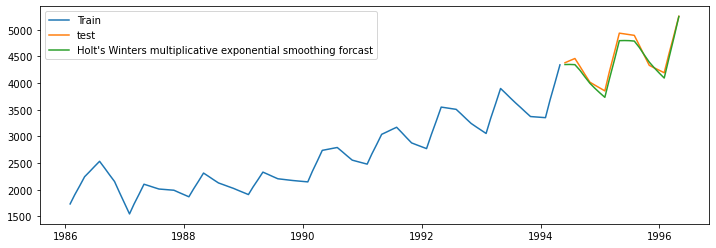

In [74]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='test')
plt.plot(y_hat_hwm['hwm_forecast'], label='Holt\'s Winters multiplicative exponential smoothing forcast')
plt.legend(loc='best')
plt.show()

# RMSE

In [75]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_hwm['hwm_forecast'])).round(2)
rmse

86.29

# MAPE Score

In [76]:
mape = round(np.mean(np.abs((test['Sales'] - y_hat_hwm['hwm_forecast'])/test['Sales'])*100),2)
mape

1.68

In [77]:
results = results.append({'Method':'Holt\'s Winter multiplicative method', 'RMSE':rmse, 'MAPE':mape}, ignore_index=True)
results

,Method,RMSE,MAPE
0,Simple Average Method,1857.28,40.49
1,Simple moving average method,895.54,17.82
2,Simple exponential smoothing method,802.75,15.49
3,Holt's exponential smoothing method,516.39,8.94
4,Holt's Winter additive method,1147.28,22.93
5,Holt's Winter multiplicative method,86.29,1.68


# Auto Regressive Model (AR Model)`

## 1. Visually checking the Stationarity

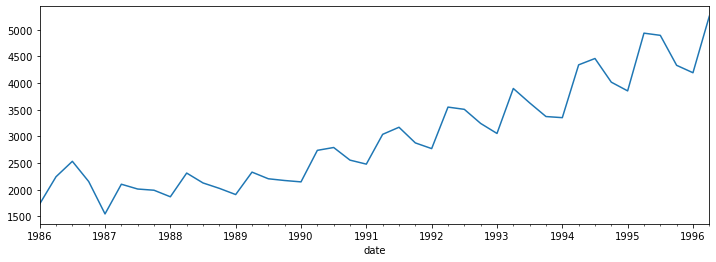

In [78]:
data['Sales'].plot(figsize=(12,4))
plt.show()

## 2. Augmented Dickey-Fuller (ADF) Test

In [79]:
from statsmodels.tsa.stattools import adfuller

In [80]:
adf_test = adfuller(data['Sales'])
adf_test

(0.5725994512262321,
 0.986920415383204,
 10,
 113,
 {'1%': -3.489589552580676,
  '5%': -2.887477210140433,
  '10%': -2.580604145195395},
 1099.5385044002155)

In [81]:
print('ADF stats: %f' % adf_test[0])
print('p-value: %f' %adf_test[1])
print('Critical value @ 0.05: %.2f' % adf_test[4]['5%'])

ADF stats: 0.572599
p-value: 0.986920
Critical value @ 0.05: -2.89


# Converting Non-Stationary to Stationary Time Series

## Box Cox Transformation

In [82]:
from scipy.stats import boxcox

In [83]:
data_boxcox = pd.Series(boxcox(data['Sales'], lmbda=0), data.index)
data_boxcox.head()


date
1986-01-31    7.458663
1986-02-28    7.552170
1986-03-31    7.637676
1986-04-30    7.716443
1986-05-31    7.758437
Freq: M, dtype: float64

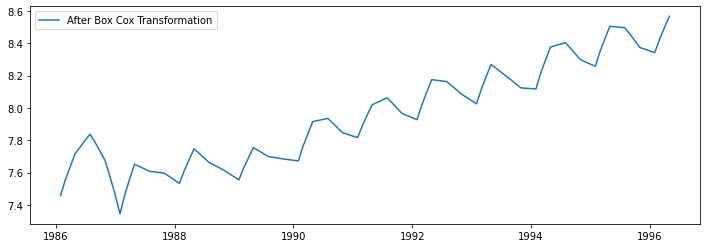

In [84]:
plt.figure(figsize=(12,4))
plt.plot(data_boxcox, label='After Box Cox Transformation')
plt.legend(loc='best')
plt.show()

# Differencing

In [85]:
data_boxcox_diff = pd.Series(data_boxcox - data_boxcox.shift(), index=data.index)

In [86]:
data_boxcox_diff.dropna(inplace=True)

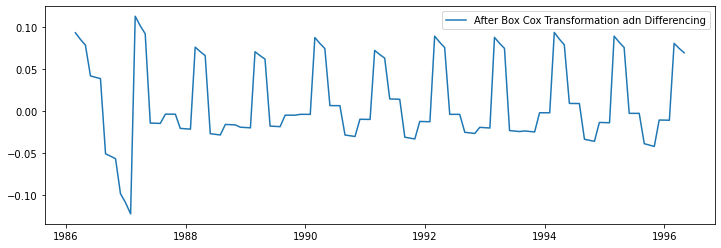

In [87]:
plt.figure(figsize=(12,4))
plt.plot(data_boxcox_diff, label='After Box Cox Transformation adn Differencing')
plt.legend(loc='best')
plt.show()

# ADF Test after Transformation

In [88]:
adf_test = adfuller(data_boxcox_diff)
adf_test

(-3.0300602132534147,
 0.03218092739693533,
 12,
 110,
 {'1%': -3.4912451337340342,
  '5%': -2.8881954545454547,
  '10%': -2.5809876033057852},
 -602.338596474247)

In [89]:
print('ADF stats: %f' % adf_test[0])
print('p-value: %f' %adf_test[1])
print('Critical value @ 0.05: %.2f' % adf_test[4]['5%'])

ADF stats: -3.030060
p-value: 0.032181
Critical value @ 0.05: -2.89


# Auto-Correaltion Function

In [90]:
from statsmodels.graphics.tsaplots import plot_acf

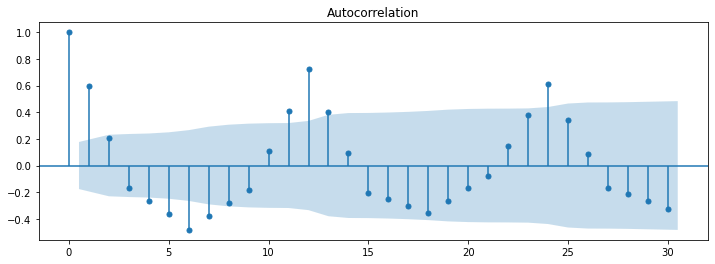

In [91]:
plt.figure(figsize=(12,4))
plot_acf(data_boxcox_diff, ax=plt.gca(), lags=30)
plt.show()

# Partial Autocorrelation Function (PACF)

In [92]:
from statsmodels.graphics.tsaplots import plot_pacf

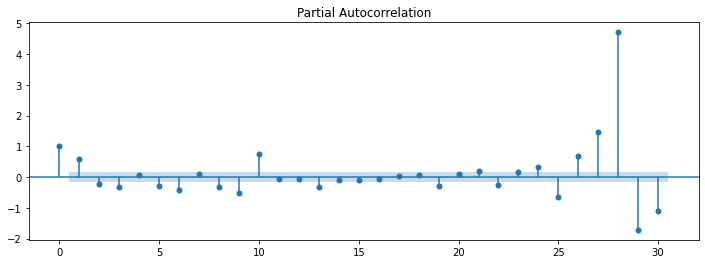

In [93]:
plt.figure(figsize=(12,4))
plot_pacf(data_boxcox_diff, ax=plt.gca(), lags=30)
plt.show()

# Building Regression Model

## Splitting Stationary dataset into train and test set

In [94]:
train_data_boxcox = data_boxcox[:train_len]
test_data_boxcox = data_boxcox[train_len:]

In [95]:
train_data_boxcox_diff = data_boxcox_diff[:train_len-1]
test_data_boxcox_diff = data_boxcox_diff[train_len-1:]

# Simple Auto Regressive Model (AR)

In [96]:
from statsmodels.tsa.arima_model import ARIMA

In [97]:
model = ARIMA(train_data_boxcox_diff, order=(1,0,0))

In [98]:
model_fit = model.fit()
model_fit.params

const      0.011643
ar.L1.y    0.611756
dtype: float64

# Forecast

In [99]:
y_hat_ar = data_boxcox_diff.copy()

In [100]:
y_hat_ar['ar_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())

# Recover original time series forecast

In [101]:
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox_diff'].cumsum()

In [102]:
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox'].add(data_boxcox[0])

In [103]:
y_hat_ar['ar_forecast'] = np.exp(y_hat_ar['ar_forecast_boxcox'])

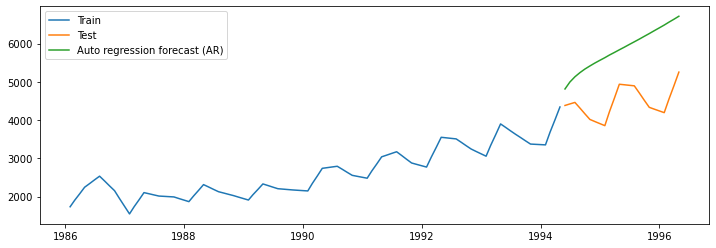

In [104]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_ar['ar_forecast'][test.index.min():], label='Auto regression forecast (AR)')
plt.legend(loc='best')
plt.show()

# RMSE

In [105]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_ar['ar_forecast'][test.index.min():])).round(2)
rmse

1485.93

# MAPE Score

In [106]:
mape = round(np.mean(np.abs((test['Sales'] - y_hat_ar['ar_forecast'][test.index.min():])/test['Sales'])*100),2)
mape

31.91

In [107]:
results = results.append({'Method':'Auto regressive (AR) method', 'RMSE':rmse, 'MAPE':mape}, ignore_index=True)
results

,Method,RMSE,MAPE
0,Simple Average Method,1857.28,40.49
1,Simple moving average method,895.54,17.82
2,Simple exponential smoothing method,802.75,15.49
3,Holt's exponential smoothing method,516.39,8.94
4,Holt's Winter additive method,1147.28,22.93
5,Holt's Winter multiplicative method,86.29,1.68
6,Auto regressive (AR) method,1485.93,31.91


# Moving Average method (MA)

In [108]:
model = ARIMA(train_data_boxcox_diff, order=(0,0,1))

In [109]:
model_fit = model.fit()
model_fit.params

const      0.009819
ma.L1.y    0.484205
dtype: float64

In [110]:
y_hat_ma = data_boxcox_diff.copy()

In [111]:
y_hat_ma['ma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())

# Recover original time series forecast

In [112]:
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox_diff'].cumsum()

In [113]:
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox'].add(data_boxcox[0])

In [114]:
y_hat_ma['ma_forecast'] = np.exp(y_hat_ma['ma_forecast_boxcox'])

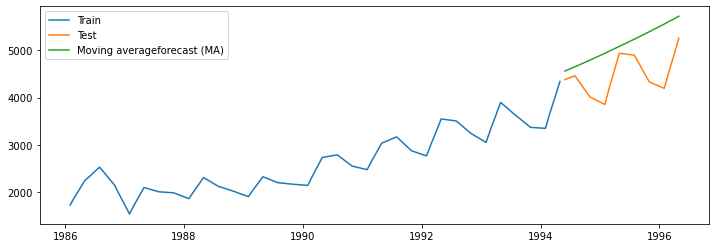

In [115]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_ma['ma_forecast'][test.index.min():], label='Moving averageforecast (MA)')
plt.legend(loc='best')
plt.show()

# RMSE

In [116]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_ma['ma_forecast'][test.index.min():])).round(2)
rmse

760.43

# MAPE Score

In [117]:
mape = round(np.mean(np.abs((test['Sales'] - y_hat_ma['ma_forecast'][test.index.min():])/test['Sales'])*100),2)
mape

15.35

In [118]:
results = results.append({'Method':'Moving average (MA) method', 'RMSE':rmse, 'MAPE':mape}, ignore_index=True)
results

,Method,RMSE,MAPE
0,Simple Average Method,1857.28,40.49
1,Simple moving average method,895.54,17.82
2,Simple exponential smoothing method,802.75,15.49
3,Holt's exponential smoothing method,516.39,8.94
4,Holt's Winter additive method,1147.28,22.93
5,Holt's Winter multiplicative method,86.29,1.68
6,Auto regressive (AR) method,1485.93,31.91
7,Moving average (MA) method,760.43,15.35


# Auto Regressive Moving Average (ARMA)

In [119]:
model = ARIMA(train_data_boxcox_diff, order=(1,0,1))

In [120]:
model_fit = model.fit()
model_fit.params

const      0.011082
ar.L1.y    0.510143
ma.L1.y    0.171535
dtype: float64

In [121]:
y_hat_arma = data_boxcox_diff.copy()

In [122]:
y_hat_arma['arma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())

In [123]:
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox_diff'].cumsum()

In [124]:
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox'].add(data_boxcox[0])

In [125]:
y_hat_arma['arma_forecast'] = np.exp(y_hat_arma['arma_forecast_boxcox'])

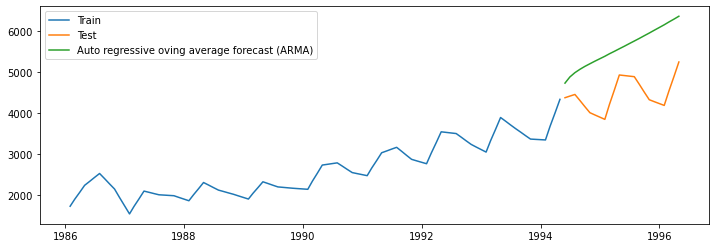

In [126]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_arma['arma_forecast'][test.index.min():], label='Auto regressive oving average forecast (ARMA)')
plt.legend(loc='best')
plt.show()

# RMSE

In [127]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_arma['arma_forecast'][test.index.min():])).round(2)
rmse

1234.22

# MAPE Score

In [128]:
mape = round(np.mean(np.abs((test['Sales'] - y_hat_arma['arma_forecast'][test.index.min():])/test['Sales'])*100),2)
mape

26.33

In [129]:
results = results.append({'Method':'Auto regressive moving average (ARMA) method', 'RMSE':rmse, 'MAPE':mape}, ignore_index=True)
results

,Method,RMSE,MAPE
0,Simple Average Method,1857.28,40.49
1,Simple moving average method,895.54,17.82
2,Simple exponential smoothing method,802.75,15.49
3,Holt's exponential smoothing method,516.39,8.94
4,Holt's Winter additive method,1147.28,22.93
5,Holt's Winter multiplicative method,86.29,1.68
6,Auto regressive (AR) method,1485.93,31.91
7,Moving average (MA) method,760.43,15.35
8,Auto regressive moving average (ARMA) method,1234.22,26.33


# Auto Regressive Integrated Moving Average (ARIMA)

In [130]:
model = ARIMA(train_data_boxcox, order=(1,1,1))

In [131]:
model_fit = model.fit()
model_fit.params

const        0.011082
ar.L1.D.y    0.510143
ma.L1.D.y    0.171535
dtype: float64

In [132]:
y_hat_arima = data_boxcox_diff.copy()

In [133]:
y_hat_arima['arima_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())

In [134]:
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox_diff'].cumsum()

In [135]:
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox'].add(data_boxcox[0])

In [136]:
y_hat_arima['arima_forecast'] = np.exp(y_hat_arima['arima_forecast_boxcox'])

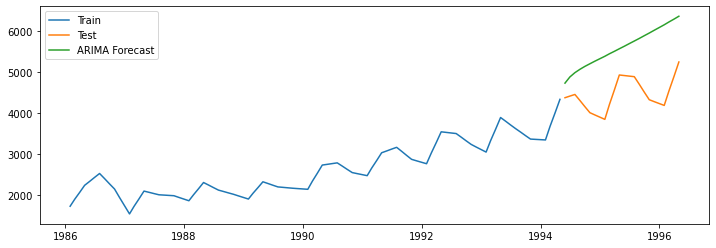

In [137]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_arima['arima_forecast'][test.index.min():], label='ARIMA Forecast')
plt.legend(loc='best')
plt.show()

# RMSE

In [138]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_arima['arima_forecast'][test.index.min():])).round(2)
rmse

1234.22

# MAPE Score

In [139]:
mape = round(np.mean(np.abs((test['Sales'] - y_hat_arima['arima_forecast'][test.index.min():])/test['Sales'])*100),2)
mape

26.33

In [140]:
results = results.append({'Method':'ARIMA method', 'RMSE':rmse, 'MAPE':mape}, ignore_index=True)
results

,Method,RMSE,MAPE
0,Simple Average Method,1857.28,40.49
1,Simple moving average method,895.54,17.82
2,Simple exponential smoothing method,802.75,15.49
3,Holt's exponential smoothing method,516.39,8.94
4,Holt's Winter additive method,1147.28,22.93
5,Holt's Winter multiplicative method,86.29,1.68
6,Auto regressive (AR) method,1485.93,31.91
7,Moving average (MA) method,760.43,15.35
8,Auto regressive moving average (ARMA) method,1234.22,26.33
9,ARIMA method,1234.22,26.33


# Seasonal Auto Regressive Integrated Moving Average (SARIMA)

In [141]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [142]:
model = SARIMAX(train_data_boxcox, order=(1,1,1), seasonal_order=(1,1,1,12))

In [143]:
model_fit = model.fit()
model_fit.params

ar.L1       0.530333
ma.L1       0.173083
ar.S.L12   -0.215640
ma.S.L12    0.253692
sigma2      0.000390
dtype: float64

In [144]:
y_hat_sarima = data_boxcox_diff.copy()

# Reverse original time series forecast

In [145]:
y_hat_sarima['sarima_forecast_boxcox'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())

In [146]:
y_hat_sarima['sarima_forecast'] = np.exp(y_hat_sarima['sarima_forecast_boxcox'])

In [147]:
y_hat_sarima['sarima_forecast'] = np.exp(y_hat_sarima['sarima_forecast_boxcox'])

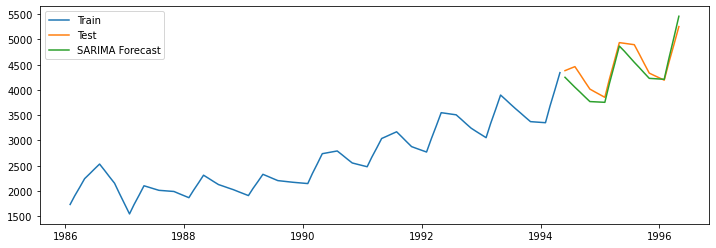

In [148]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_sarima['sarima_forecast'][test.index.min():], label='SARIMA Forecast')
plt.legend(loc='best')
plt.show()

# RMSE

In [149]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_sarima['sarima_forecast'][test.index.min():])).round(2)
rmse

205.96

# MAPE Score

In [150]:
mape = round(np.mean(np.abs((test['Sales'] - y_hat_sarima['sarima_forecast'][test.index.min():])/test['Sales'])*100),2)
mape

3.95

In [151]:
results = results.append({'Method':'SARIMA method', 'RMSE':rmse, 'MAPE':mape}, ignore_index=True)
results

,Method,RMSE,MAPE
0,Simple Average Method,1857.28,40.49
1,Simple moving average method,895.54,17.82
2,Simple exponential smoothing method,802.75,15.49
3,Holt's exponential smoothing method,516.39,8.94
4,Holt's Winter additive method,1147.28,22.93
5,Holt's Winter multiplicative method,86.29,1.68
6,Auto regressive (AR) method,1485.93,31.91
7,Moving average (MA) method,760.43,15.35
8,Auto regressive moving average (ARMA) method,1234.22,26.33
9,ARIMA method,1234.22,26.33


# Analysis
We Can see SARIMA Model is having low RMSE and low mape score and this model is used for further forecasting